# Hackathon Notebook

In [2]:
# Add your Hackathon code here
import pandas as pd
import seaborn as sns
import numpy as npz
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [3]:
df = pd.read_csv("netflix_titles.csv")

#These are inital views of the data to see what cleaning needs to be done.

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [229]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


For easy workings later, date_added needs to be changed to a datetime format and duration should be changed to an integer. To protect the orignial data a copy will be made.

For easy workings later, date_added needs to be changed to a datetime format and make new columns for year, month and day. Duration should be changed to an integer. To protect the orignial data a copy will be made.

In [6]:
df1 = df.copy()
df1['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='%B %d, %Y')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [7]:
df1['release_year'] = pd.to_numeric(df1['release_year'])
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
#Adding a column for added month
df1['added_month'] = df1['date_added'].dt.month.astype('Int64')
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9


In [9]:
#Adding a column for added day
df1['added_day'] = df1['date_added'].dt.day.astype('Int64')
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,24


In [10]:
#Filling NaN in 'director', 'cast' and 'country' with Unknown as a string
df1[['director', 'cast', 'country']] = df1[['director', 'cast', 'country']].fillna('Unknown').astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  added_month   8709 non-null   Int64         
 13  added_day     8709 non-null   Int64         
dtypes: Int64(2), datetime64[ns](1), int64(1), object(10)
memory usage: 980.6+ KB


In [11]:
#Filling NaN in rating with "Not Rated" as a string
df1[['rating']] = df1[['rating']].fillna('Not Rated').astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  added_month   8709 non-null   Int64         
 13  added_day     8709 non-null   Int64         
dtypes: Int64(2), datetime64[ns](1), int64(1), object(10)
memory usage: 980.6+ KB


In [12]:
#Checking the unique values in 'rating column. There are a few that looks like they should be in the duration column
df1['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Not Rated', 'TV-Y7-FV', 'UR'], dtype=object)

In [13]:
#Checking what the line for this value looks like
dfmovies1 = df1.loc[df1['rating'] == '74 min']
dfmovies1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",4,4


In [14]:
#Changing the value in rating to 'Not rated'
df1['rating'] = df1['rating'].replace('74 min', 'Not rated')

#Change the value in 'duration' to the right one
df1.at[5541, 'duration'] = '74 min'

#Checking the line so all values are corrected
row_5541_as_dataframe = df1.loc[[5541]]
row_5541_as_dataframe

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Not rated,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",4,4


In [15]:
#Changing the value in 'duration' to '84'
df1.at[5794, 'duration'] = '84 min'

#Changing the value in rating to 'Not rated'
df1['rating'] = df1['rating'].replace('84 min', 'Not rated')
row_5794_as_dataframe = df1.loc[[5794]]
row_5794_as_dataframe


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Not rated,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,9,16


In [16]:
#Changing the value in rating to 'Not rated'
df1['rating'] = df1['rating'].replace('66 min', 'Not rated')

#Changing the value in duration to the right one
df1.at[5813, 'duration'] = '66 min'
row_5813_as_dataframe = df1.loc[[5813]]
row_5813_as_dataframe

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Not rated,66 min,Movies,The comic puts his trademark hilarious/thought...,8,15


In [17]:
#Replacing NR with Not rated for uniformity
df1['rating'] = df1['rating'].astype(str).str.strip().replace('NR', 'Not rated')

In [18]:
#Setting a df that contains every line for shows.
dfshows = df1[df1['type'] == 'TV Show']
dfshows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,24
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,24
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,24
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9,24


In [231]:
#Setting the variable so that we will have a Dataframe for just movies.
dfmovies = df1[df1['type'] == 'Movie']
dfmovies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,25
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,24
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9,23


In [20]:
#Removing words from duration
dfshows.loc[:, 'duration'] = dfshows['duration'].str.replace('Seasons', '')
dfshows.loc[:, 'duration'] = dfshows['duration'].str.replace('Season', '')
dfshows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,24
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,24
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,24
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9,24


In [21]:
#Removing any  spaces and then casting 'duration' as integer. Resetting index.
#dfshows.loc[:, 'duration'] = dfshows['duration'].str.strip()
dfshows.loc[:, 'duration'] = dfshows['duration'].astype(int)
dfshows = dfshows.reset_index()

In [22]:
#Checking if there are any not NaN. Not NaN is all rows so nothing is missing.
dfshows['duration'] = dfshows['duration'].fillna(0).astype(int)
dfshows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         2676 non-null   int64         
 1   show_id       2676 non-null   object        
 2   type          2676 non-null   object        
 3   title         2676 non-null   object        
 4   director      2676 non-null   object        
 5   cast          2676 non-null   object        
 6   country       2676 non-null   object        
 7   date_added    2578 non-null   datetime64[ns]
 8   release_year  2676 non-null   int64         
 9   rating        2676 non-null   object        
 10  duration      2676 non-null   int32         
 11  listed_in     2676 non-null   object        
 12  description   2676 non-null   object        
 13  added_month   2578 non-null   Int64         
 14  added_day     2578 non-null   Int64         
dtypes: Int64(2), datetime64[ns](1), int32(

Now we can make some plots to see how the data looks and how it compares to itself.

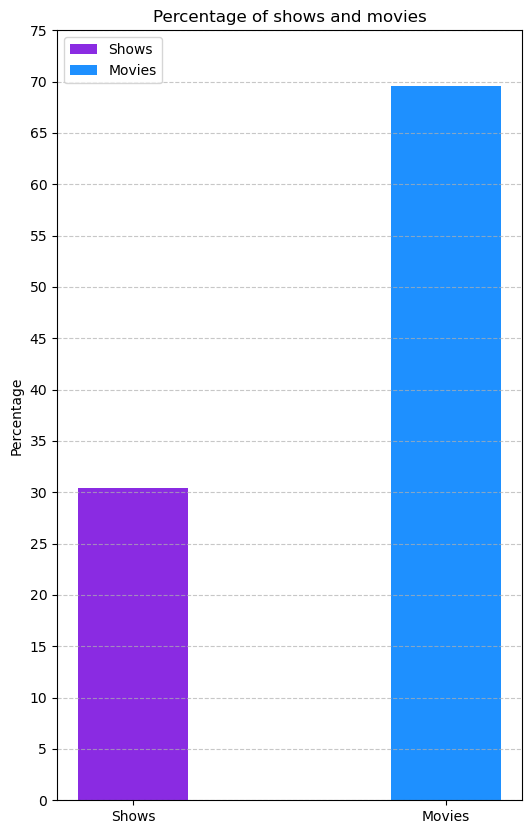

In [24]:
#This plot shows the percentage devision between shows and movies.
#Size
plt.figure(figsize=(6,10))
bar_width = 0.35

# List of values and corresponding labels
counts_shows = len(dfshows) / (len(dfshows) + len(dfmovies)) *100
counts_movies = len(dfmovies) / (len(dfshows) + len(dfmovies)) *100

values = [counts_shows, counts_movies]
labels = ['Shows', 'Movies']

# Position of bars on X-axis
r1 = range(len(labels))
plt.bar(r1, values, color=['#8A2BE2', '#1E90FF'], width=bar_width, label=labels)

#plt.xlabel('Types')
plt.ylabel('Percentage')
plt.title('Percentage of shows and movies')
plt.xticks(r1, labels)
plt.yticks(range(0, 80, 5))

#Add legend
plt.legend(loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()

#plt.savefig('showsmoviesbar.png', bbox_inches = 'tight')

In [29]:
#Let's see if we can adjust for the amount of seasons a show has by calculating the duration of shows, giving 2 seasons, two entries and so on.
nullduration= dfshows['duration'].value_counts()
nullduration
all_instance = []
for x, y in nullduration.items():
    instances = x*y
    all_instance.append(instances)

total_instance = sum(all_instance)
print(total_instance) #This value is used in the plotting above

4723


In [3]:
#This plot shows the percentage devision between shows and movies but this is adjusted for the length of seasons meaning 14 seasons would now count as 14 entries.
#Size
plt.figure(figsize=(6,10))
bar_width = 0.35

# List of values and corresponding labels
counts_movies = len(dfmovies) / ((47230) + len(dfmovies)) *100
shows_seasons = 4723 / ((4723) + len(dfmovies)) *100

values = [shows_seasons, counts_movies]
labels = ['Shows adjusted for seasons', 'Movies']

# Position of bars on X-axis
r1 = range(len(labels))
plt.bar(r1, values, color=['#9370DB', '#1E90FF'], width=bar_width, label=labels)

#plt.xlabel('Types')
plt.ylabel('Percentage')
plt.title('Percentage of shows and movies')
plt.xticks(r1, labels)
plt.yticks(range(0, 80, 5))

#Add legend
plt.legend(loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
#plt.savefig('percentmovies shows adjusted', bbox_inches = 'tight')

NameError: name 'plt' is not defined

In [26]:
#Percentage movies when adjusted for multiple seasons
counts_movies = len(dfmovies) / ((4723) + len(dfmovies)) *100
counts_movies

56.486088078127885

In [27]:
percentshows = len(dfshows) / (len(dfshows) + len(dfmovies)) *100
percentmovies = len(dfmovies) / (len(dfshows) + len(dfmovies)) *100
percent_adjusted_shows_seasons = 4723 / ((4723) + len(dfmovies)) *100
percent_adjusted_movies_seasons = len(dfmovies) / ((4723) + len(dfmovies)) *100
print(f'The percentage for shows is {round(percentshows)} and for movies it is {round(percentmovies)}')
print(f'When adjusted for show seasons, percent shows is {round(percent_adjusted_shows_seasons)} and movies is {round(percent_adjusted_movies_seasons)}')

The percatage for shows is 30 and for movies it is 70
When adjusted for show seasons, percent shows is 44 and 56


In [28]:
total_duration = dfshows['duration'].notnull().sum()
total_duration

2676

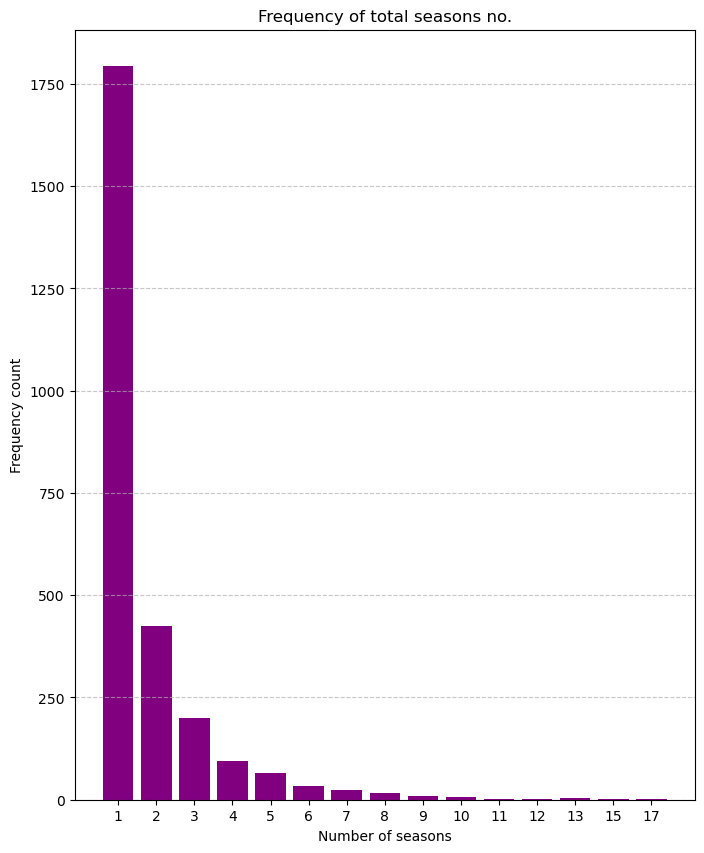

In [30]:
#Plot to show how many times each season length occurs
duration_counts = dfshows['duration'].value_counts()
duration_counts = duration_counts.sort_index()

#Size
plt.figure(figsize=(8,10))

plt.bar(duration_counts.index.astype(str), duration_counts.values, color='purple')

plt.xlabel('Number of seasons')
plt.ylabel('Frequency count')
plt.title('Frequency of total seasons no.')

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('Frequency of total seasons', bbox_inches = 'tight')

In [31]:
#Sorting each value in 'duration' for correct input by counting
sorted_seasons = sorted([2, 1, 9, 4, 5, 3, 6, 7, 10, 8, 17, 13, 15, 12, 11])
sorted_seasons

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17]

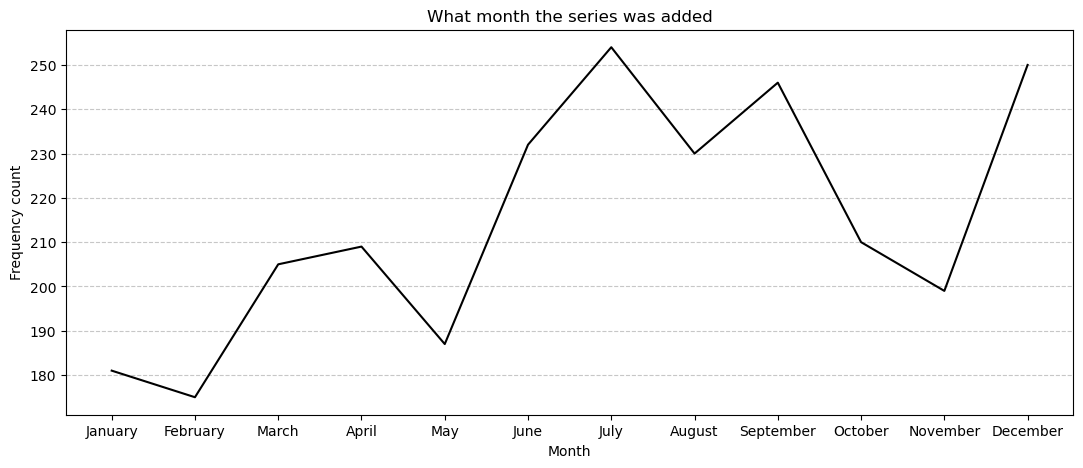

In [32]:
#Plot to show the most popular month for adding a show
added_month_counts = dfshows['added_month'].value_counts()
added_month_counts = added_month_counts.sort_index()

#Size
plt.figure(figsize=(13,5))

plt.plot(added_month_counts.index.astype(str), added_month_counts.values, color='black')

plt.xlabel('Month')
plt.ylabel('Frequency count')
plt.title('What month the series was added')
plt.xticks(ticks=range(0, 12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('month series added', bbox_inches = 'tight')

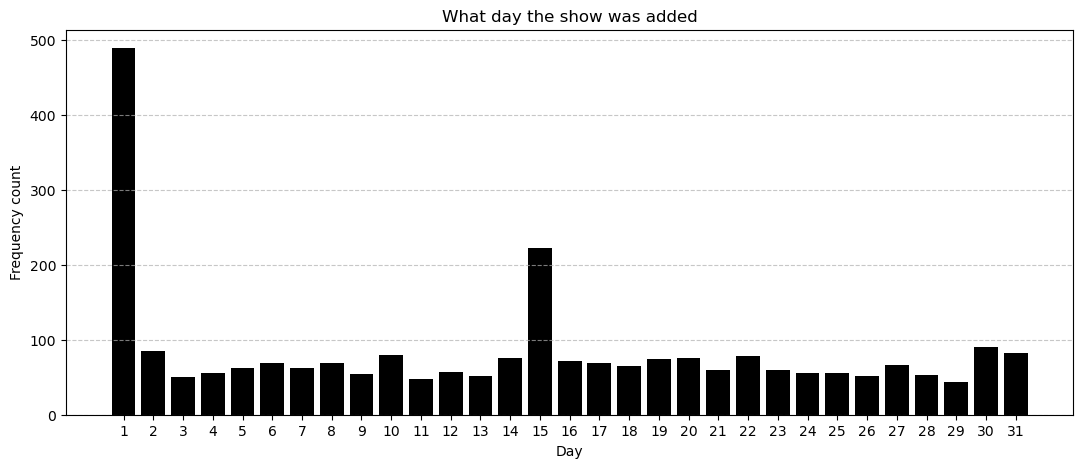

In [33]:
#Plot to show the most popular day for adding a show
added_day_counts = dfshows['added_day'].value_counts()
added_day_counts = added_day_counts.sort_index()
added_day_counts = added_day_counts.astype(int)

#Size
plt.figure(figsize=(13,5))

plt.bar(added_day_counts.index.astype(str), added_day_counts.values, color='black')

plt.xlabel('Day')
plt.ylabel('Frequency count')
plt.title('What day the show was added')

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('day show added bar', bbox_inches = 'tight')

In [34]:
#Lets have a look at how the ratings are distributed.
rating_counts = dfshows['rating'].value_counts()
rating_counts

rating
TV-MA        1145
TV-14         733
TV-PG         323
TV-Y7         195
TV-Y          176
TV-G           94
Not rated       7
R               2
TV-Y7-FV        1
Name: count, dtype: int64

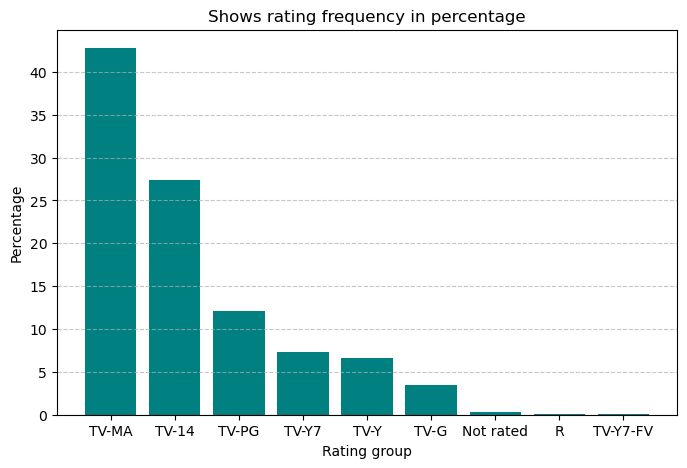

In [35]:
#Plot to show the most common rating
#rating_counts = dfshows['rating'].value_counts()
#rating_counts = rating_counts.sort_index()
#rating_percentages = (rating_counts / rating_counts.sum()) * 100

total_count = rating_counts.sum()
rating_percentages = (rating_counts / total_count) * 100

#Size
plt.figure(figsize=(8,5))

plt.bar(rating_percentages.index.astype(str), rating_percentages.values, color='teal')

plt.xlabel('Rating group')
plt.ylabel('Percentage')
plt.title('Shows rating frequency in percentage')

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('Rating frequency show ', bbox_inches = 'tight')

In [36]:
#Looking at what values in 'listed_in' are most common. It looks like International TV Shows is in more than one group.
listed_counts = dfshows['listed_in'].value_counts()
total_listed_count = listed_counts.sum()
listed_rating_percentages = (listed_counts / total_listed_count) * 100
listed_rating_percentages.head(5)

listed_in
Kids' TV                                             8.221226
International TV Shows, TV Dramas                    4.521674
Crime TV Shows, International TV Shows, TV Dramas    4.110613
Kids' TV, TV Comedies                                3.699552
Reality TV                                           3.550075
Name: count, dtype: float64

In [37]:
#Find the string we're looking for
international_str = dfshows[dfshows['listed_in'].str.contains('International')]
#Count the occurance of each of the categories found
value_count_ic = international_str['listed_in'].value_counts()
#Calculate the total sum of the value count
total_ic = value_count_ic.sum()
#This gives the top ten. Change head for more. Observe that total_listed_count comes from line above to compare with all other categories in listed in.
top_ten_percentages = (value_count_ic / total_listed_count * 100).head(10)
top_ten_percentages

listed_in
International TV Shows, TV Dramas                                    4.521674
Crime TV Shows, International TV Shows, TV Dramas                    4.110613
International TV Shows, Romantic TV Shows, TV Comedies               3.512706
International TV Shows, Romantic TV Shows, TV Dramas                 3.363229
Anime Series, International TV Shows                                 3.288490
International TV Shows, Korean TV Shows, Romantic TV Shows           2.428999
Crime TV Shows, International TV Shows, Spanish-Language TV Shows    2.316891
International TV Shows, TV Comedies, TV Dramas                       1.494768
International TV Shows, Reality TV                                   1.420030
International TV Shows, TV Comedies                                  1.307922
Name: count, dtype: float64

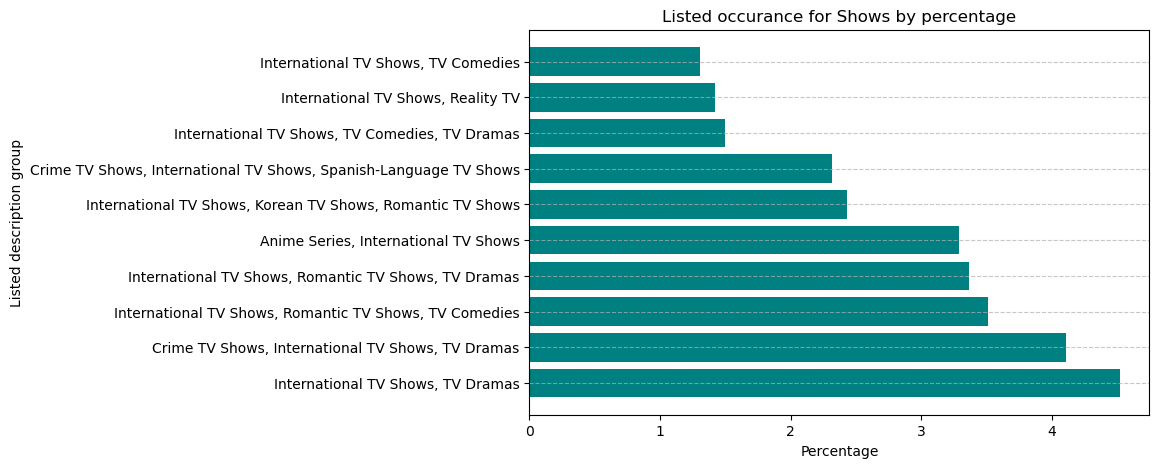

In [38]:
#This plot shows the occuranace for the 'listed in' by percentage.
#Size
plt.figure(figsize=(8,5))

plt.barh(top_ten_percentages.index.astype(str), top_ten_percentages.values, color='teal')

plt.ylabel('Listed description group')
plt.xlabel('Percentage')
plt.title('Listed occurance for Shows by percentage')
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('listed occurance shows', bbox_inches = 'tight')


In [39]:
#Looking at occurance of Drama
#Find the string we're looking for
drama_str = dfshows[dfshows['listed_in'].str.contains('Drama')]
#Count the occurance of each of the categories found
value_count_dr = drama_str['listed_in'].value_counts()
#Calculate the total sum of the value count
total_dr = value_count_dr.sum()
#This give the top ten. Change head for more. Observe that total_listed_count come from line above to compare with all other categories in listed in.
dramatop_ten_percentages = (value_count_dr / total_listed_count * 100).head(10)
dramatop_ten_percentages

listed_in
International TV Shows, TV Dramas                               4.521674
Crime TV Shows, International TV Shows, TV Dramas               4.110613
International TV Shows, Romantic TV Shows, TV Dramas            3.363229
International TV Shows, TV Comedies, TV Dramas                  1.494768
TV Dramas                                                       1.307922
TV Comedies, TV Dramas                                          1.121076
International TV Shows, Spanish-Language TV Shows, TV Dramas    0.971599
International TV Shows, TV Dramas, TV Mysteries                 0.971599
International TV Shows, TV Action & Adventure, TV Dramas        0.784753
International TV Shows, Korean TV Shows, TV Dramas              0.672646
Name: count, dtype: float64

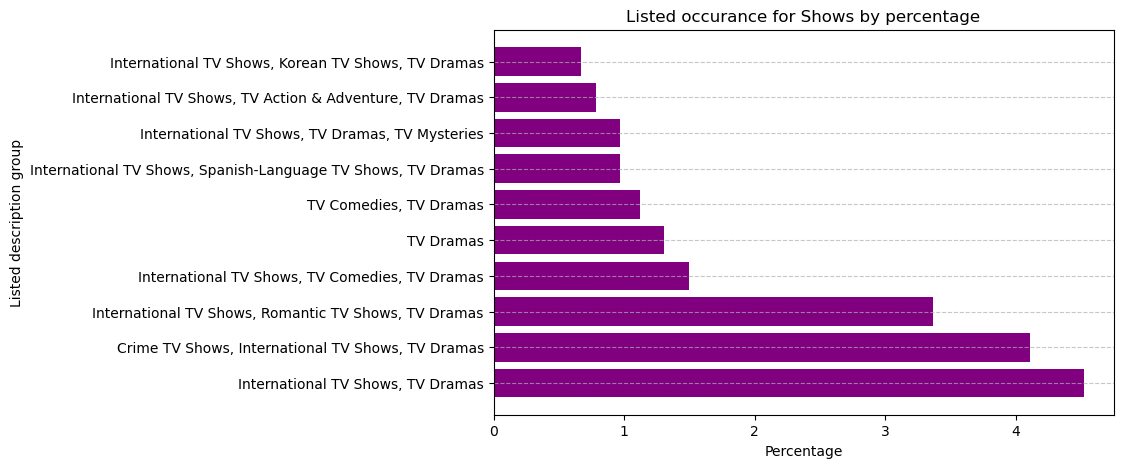

In [40]:
#Plot for showing 'Drama' occurance
#Size
plt.figure(figsize=(8,5))

plt.barh(dramatop_ten_percentages.index.astype(str), dramatop_ten_percentages.values, color='purple')

plt.ylabel('Listed description group')
plt.xlabel('Percentage')
plt.title('Listed occurance for Shows by percentage')
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('listed occurance shows drama', bbox_inches = 'tight')


In [41]:
#Finding occurance of 'Comedy'
#Find the string we're looking for
comedy_str = dfshows[dfshows['listed_in'].str.contains('Comedies')]
#Count the occurance of each of the categories found
value_count_co = comedy_str['listed_in'].value_counts()
#Calculate the total sum of the value count
total_co = value_count_co.sum()
#This give the top ten. Change head for more. Observe that total_listed_count come from line above to compare with all other categories in listed in.
top_ten_percentagescomedy = (value_count_co / total_listed_count * 100).head(10)
top_ten_percentagescomedy

listed_in
Kids' TV, TV Comedies                                             3.699552
International TV Shows, Romantic TV Shows, TV Comedies            3.512706
TV Comedies                                                       2.578475
International TV Shows, TV Comedies, TV Dramas                    1.494768
International TV Shows, TV Comedies                               1.307922
TV Comedies, TV Dramas                                            1.121076
Stand-Up Comedy & Talk Shows, TV Comedies                         1.008969
British TV Shows, International TV Shows, TV Comedies             0.635277
International TV Shows, Spanish-Language TV Shows, TV Comedies    0.635277
British TV Shows, TV Comedies                                     0.411061
Name: count, dtype: float64

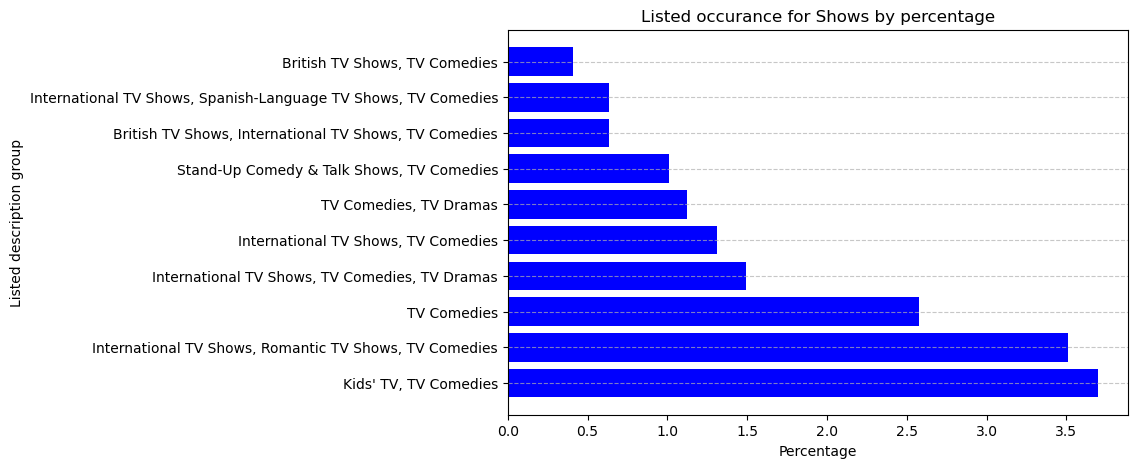

In [235]:
#Make the plot for comedy occurance
#Size
plt.figure(figsize=(8,5))

plt.barh(top_ten_percentagescomedy.index.astype(str), top_ten_percentagescomedy.values, color='blue')

plt.ylabel('Listed description group')
plt.xlabel('Percentage')
plt.title('Listed occurance for Shows by percentage')
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('listed occurance shows comedy', bbox_inches = 'tight')


#Getting numbers for the percentages of key words

In [43]:
all_international = listed_rating_percentages[listed_rating_percentages.index.str.contains('International')]
all_international.sum()

50.48579970104635

In [44]:
all_kids = listed_rating_percentages[listed_rating_percentages.index.str.contains('Kids')]
all_kids.sum()

16.85351270553064

In [45]:
all_reality = listed_rating_percentages[listed_rating_percentages.index.str.contains('Reality')]
all_reality.sum()

9.529147982062778

In [46]:
all_dramas = listed_rating_percentages[listed_rating_percentages.index.str.contains('Dramas')]
all_dramas.sum()

28.51270553064275

In [47]:
all_comedies = listed_rating_percentages[listed_rating_percentages.index.str.contains('Comedies')]
all_comedies.sum()

21.71150971599402

In [48]:
all_thriller = listed_rating_percentages[listed_rating_percentages.index.str.contains('Thriller')]
all_thriller.sum()

2.130044843049328

In [49]:
all_romantic = listed_rating_percentages[listed_rating_percentages.index.str.contains('Romantic')]
all_romantic.sum()

13.826606875934228

In [50]:
all_fantasy = listed_rating_percentages[listed_rating_percentages.index.str.contains('Fantasy')]
all_fantasy.sum()

3.1390134529147997

In [51]:
all_anime = listed_rating_percentages[listed_rating_percentages.index.str.contains('Anime')]
all_anime.sum()

6.576980568011959

In [52]:
all_scifi = listed_rating_percentages[listed_rating_percentages.index.str.contains('Sci-Fi')]
all_scifi.sum()

3.1390134529147997

In [53]:
#Dictionary with the numbers
datashows = {
    'Anime': [6.57],
    'Comedies': [21.71],
    'Drama': [28.51],
    'Fantasy': [3.14],
    'International': [50.49],
    'Kids': [16.85],
    'Reality': [9.53],
    'Romantic': [13.83],
    'Sci-Fi': [3.14],
    'Thriller': [2.13],
}
showgenre = pd.DataFrame.from_dict(datashows)
showgenre 

,Anime,Comedies,Drama,Fantasy,International,Kids,Reality,Romantic,Sci-Fi,Thriller
0,6.57,21.71,28.51,3.14,50.49,16.85,9.53,13.83,3.14,2.13


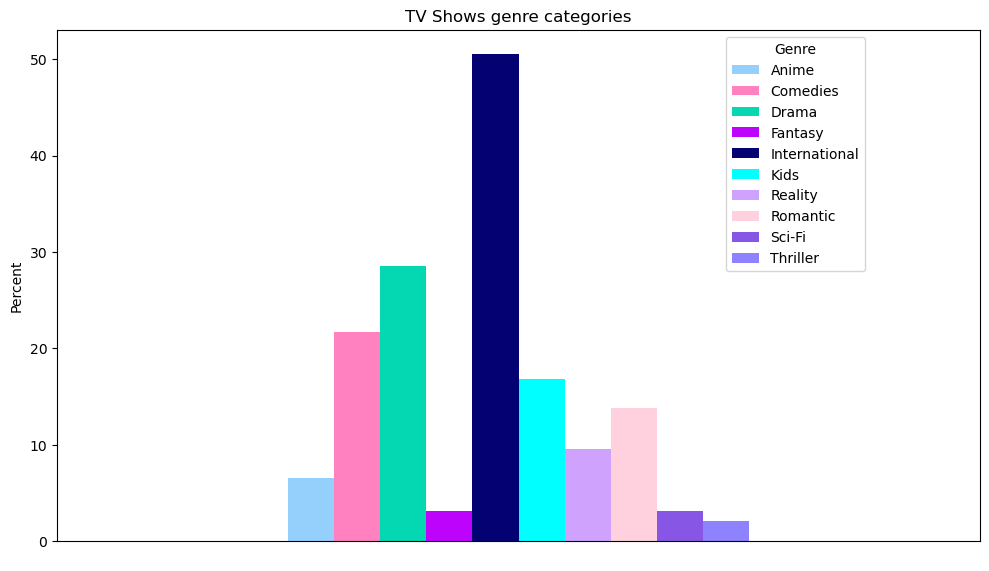

In [237]:
#This visual shows The percentage of each type of show
palette = ['#95d0fc', '#ff81c0', '#04d8b2', '#be03fd', '#040273', '#00ffff', '#cea2fd', '#ffd1df', '#8756e4', '#8e82fe']
sns.set_palette(palette)

labels = ['Anime', 'Comedies', 'Drama', 'Fantasy', 'International', 'Kids', 'Reality', 'Romantic', 'Sci-Fi', 'Thriller']
showgenre.plot(kind = 'bar', figsize = (10,6))
plt.title('TV Shows genre categories')
plt.xlabel(' ')
plt.ylabel('Percent')
plt.legend(title = 'Genre', bbox_to_anchor = (0.80, 1), loc = 'upper center')
plt.tight_layout()
plt.xticks([])
plt.savefig('Shows genre catergories', bbox_inches = 'tight')

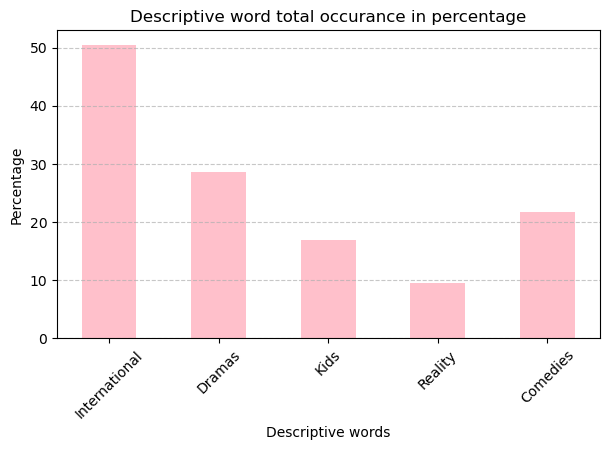

In [55]:
#Plot showing percentage of descriptive word occurance
plt.figure(figsize=(7,4))

categories = ['International',
              'Dramas',
              'Kids',
              'Reality',
              'Comedies']

percentages = [all_international.sum(),
               all_dramas.sum(),
               all_kids.sum(),
               all_reality.sum(),
               all_comedies.sum()]

plt.bar(categories, percentages, color='pink', width=0.5)

plt.xlabel('Descriptive words')
plt.ylabel('Percentage')
plt.title('Descriptive word total occurance in percentage')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('descriptive word total shows', bbox_inches = 'tight')

In [56]:
dfmovies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,25
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,24
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9,23


In [5]:
#Checking for cleaning need and then removing the min part and making duration for movies an integer.
dfmovies['duration'].unique()

NameError: name 'dfmovies' is not defined

In [58]:
dfmovies.loc[:, 'duration'] = dfmovies['duration'].str.replace('min', '')

In [59]:
dfmovies.loc[:, 'duration'] = dfmovies['duration'].astype(int)
dfmovies = dfmovies.reset_index()
dfmovies

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,25
1,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,24
2,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,24
3,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,24
4,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,9,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,3,9
6127,8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,20
6128,8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,1
6129,8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,11


In [60]:
dfmovies['duration'] = dfmovies['duration'].fillna(0).astype(int)
dfmovies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6131 entries, 0 to 6130
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         6131 non-null   int64         
 1   show_id       6131 non-null   object        
 2   type          6131 non-null   object        
 3   title         6131 non-null   object        
 4   director      6131 non-null   object        
 5   cast          6131 non-null   object        
 6   country       6131 non-null   object        
 7   date_added    6131 non-null   datetime64[ns]
 8   release_year  6131 non-null   int64         
 9   rating        6131 non-null   object        
 10  duration      6131 non-null   int32         
 11  listed_in     6131 non-null   object        
 12  description   6131 non-null   object        
 13  added_month   6131 non-null   Int64         
 14  added_day     6131 non-null   Int64         
dtypes: Int64(2), datetime64[ns](1), int32(

In [7]:
#Looking for common directors
dfmovies['director'].value_counts()

NameError: name 'dfmovies' is not defined

In [62]:
#Making a variable for movie lengths
movies_duration_sort =dfmovies['duration'].sort_values(ascending = False)
movies_duration_sort

2703    312
449     273
1630    253
1626    237
1624    233
       ... 
2276     10
1017      9
972       8
1777      5
2402      3
Name: duration, Length: 6131, dtype: int32

In [63]:
movies_duration_sort.unique()

array([312, 273, 253, 237, 233, 230, 229, 228, 224, 214, 212, 209, 208,
       205, 204, 203, 201, 200, 196, 195, 194, 193, 192, 191, 190, 189,
       187, 186, 185, 182, 181, 180, 179, 178, 177, 176, 174, 173, 172,
       171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159,
       158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146,
       145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133,
       132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120,
       119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107,
       106, 105, 104, 103, 102, 101, 100,  99,  98,  97,  96,  95,  94,
        93,  92,  91,  90,  89,  88,  87,  86,  85,  84,  83,  82,  81,
        80,  79,  78,  77,  76,  75,  74,  73,  72,  71,  70,  69,  68,
        67,  66,  65,  64,  63,  62,  61,  60,  59,  58,  57,  56,  55,
        54,  53,  52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,
        41,  40,  39,  38,  37,  36,  35,  34,  33,  32,  31,  3

In [64]:
#Calculating the total minutes of all movies
totmins = dfmovies['duration'].sum()
totmins

610433

In [65]:
dfmovies['duration'].count()

6131

In [66]:
#Calculating the mean minutes 
mean_mins = (totmins / 6131).round()
mean_mins

100.0

In [67]:
#Checking most common duration for movies
sorteddfmovies = dfmovies['duration'].value_counts()
sorteddfmovies

duration
90     152
94     146
97     146
93     146
91     144
      ... 
208      1
5        1
16       1
186      1
191      1
Name: count, Length: 205, dtype: int64

In [68]:
dfmovies['duration'].max()


312

In [69]:
dfmovies['duration'].min()

3

In [70]:
sortduration = dfmovies.copy()
sortduration = sortduration.drop(['show_id', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'description', 'added_month', 'added_day'], axis = 1)
sortduration

,index,type,rating,duration,listed_in
0,0,Movie,PG-13,90,Documentaries
1,6,Movie,PG,91,Children & Family Movies
2,7,Movie,TV-MA,125,"Dramas, Independent Movies, International Movies"
3,9,Movie,PG-13,104,"Comedies, Dramas"
4,12,Movie,TV-MA,127,"Dramas, International Movies"
...,...,...,...,...,...
6126,8801,Movie,TV-MA,96,"Dramas, International Movies, Thrillers"
6127,8802,Movie,R,158,"Cult Movies, Dramas, Thrillers"
6128,8804,Movie,R,88,"Comedies, Horror Movies"
6129,8805,Movie,PG,88,"Children & Family Movies, Comedies"


In [71]:
sortduration = sortduration.sort_values(['duration'])
sortduration    

,index,type,rating,duration,listed_in
2402,3777,Movie,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy"
1777,2713,Movie,TV-14,5,"Action & Adventure, Anime Features, Internatio..."
972,1484,Movie,PG-13,8,Dramas
1017,1557,Movie,G,9,"Children & Family Movies, Dramas"
2276,3535,Movie,TV-G,10,Documentaries
...,...,...,...,...,...
1624,2484,Movie,TV-PG,233,"Comedies, International Movies, Romantic Movies"
1626,2487,Movie,TV-14,237,"Comedies, Dramas, International Movies"
1630,2491,Movie,TV-14,253,"Comedies, Dramas, International Movies"
449,717,Movie,TV-G,273,Documentaries


In [72]:
#Here is a problem with the data, it is not clear what '1' means but in the contex for looking at occurance our top values shows up a lot more often.
sortduration['duration'].value_counts()

duration
90     152
97     146
93     146
94     146
91     144
      ... 
189      1
191      1
193      1
194      1
312      1
Name: count, Length: 205, dtype: int64

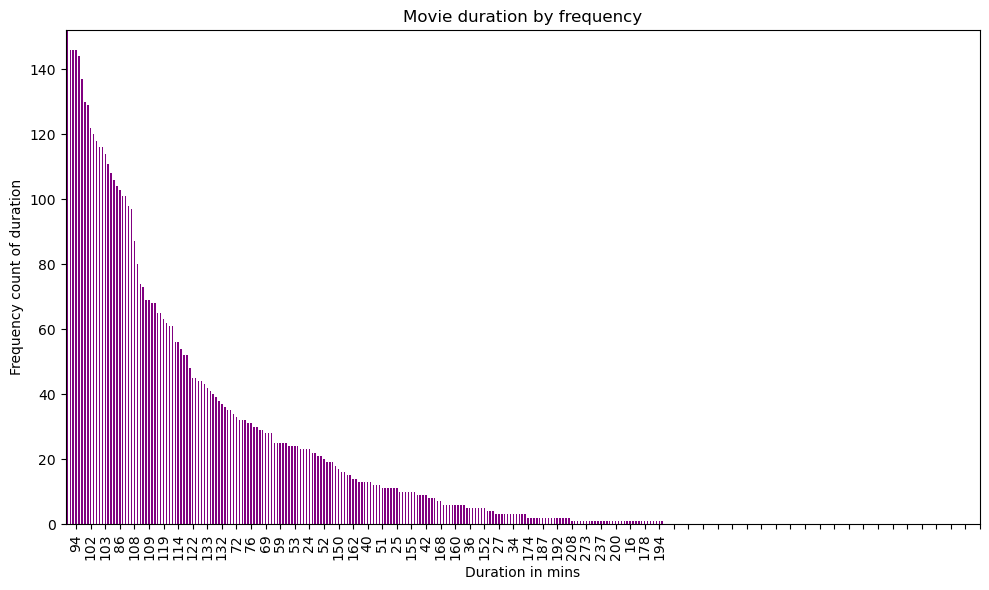

In [73]:
#Making a plot to look at frequency for duration
palette = ['purple']
sns.set_palette(palette)
duration_countmovies = sortduration['duration'].value_counts()
duration_countmovies.plot(kind='bar',
                          x = sortduration['duration'],
                          y = duration_countmovies,
                          figsize = (10, 6),
                          xlabel = ('Duration in mins'),
                          xlim = (3, 315),
                          ylabel = ('Frequency count of duration'),
                          ylim = (0, 152))

plt.title('Movie duration by frequency')
plt.xticks(np.arange(3, 315, step=5))
plt.tight_layout()
plt.savefig('movie duration by frequency', bbox_inches = 'tight')

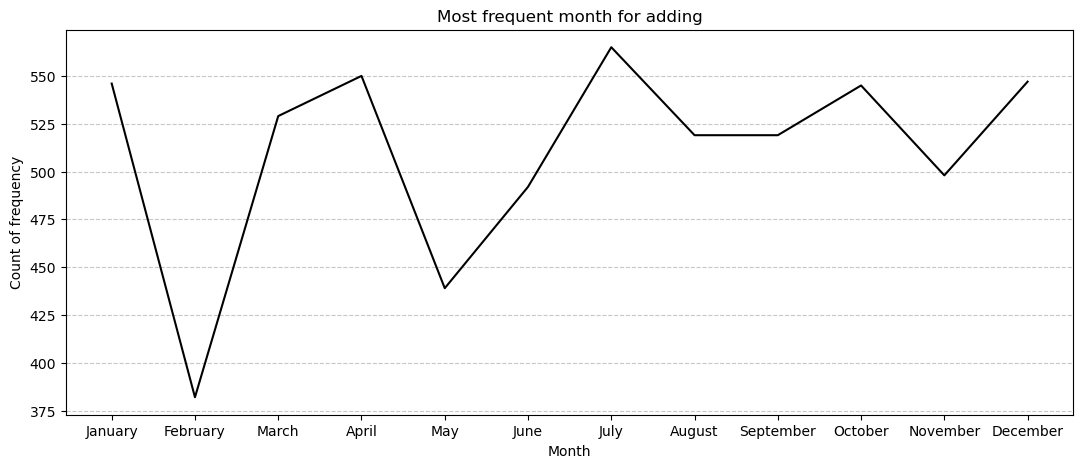

In [74]:
#This plot shows the most freqent month for adding movies. February not very popular and January, April, July and December coming out on top.
added_month_countsmovies = dfmovies['added_month'].value_counts()
added_month_countsmovies = added_month_countsmovies.sort_index()

#Size
plt.figure(figsize=(13,5))

plt.plot(added_month_countsmovies.index.astype(str), added_month_countsmovies.values, color='black')

plt.xlabel('Month')
plt.ylabel('Count of frequency')
plt.title('Most frequent month for adding')
plt.xticks(ticks=range(0, 12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('movie month added', bbox_inches = 'tight')

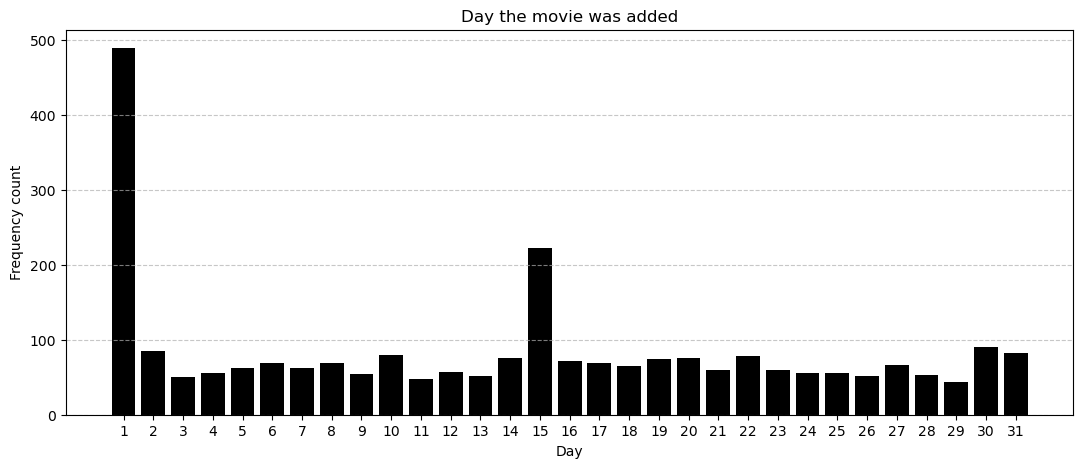

In [75]:
#Plot to show the most popular day
added_day_countmovies = dfmovies['added_day'].value_counts()
added_day_countmovies = added_day_counts.sort_index()
added_day_countmovies = added_day_counts.astype(int)

#Size
plt.figure(figsize=(13,5))

plt.bar(added_day_countmovies.index.astype(str), added_day_countmovies.values, color='black')

plt.xlabel('Day')
plt.ylabel('Frequency count')
plt.title('Day the movie was added')

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('day movie added', bbox_inches = 'tight')

In [76]:
rating_countmovies = dfmovies['rating'].value_counts()
rating_countmovies

rating
TV-MA        2062
TV-14        1427
R             797
TV-PG         540
PG-13         490
PG            287
TV-Y7         139
TV-Y          131
TV-G          126
Not rated      80
G              41
TV-Y7-FV        5
NC-17           3
UR              3
Name: count, dtype: int64

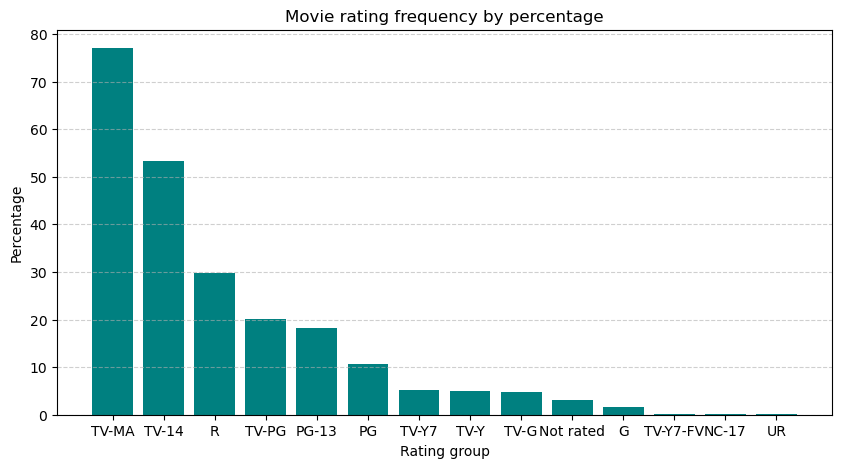

In [77]:
#Plot to show movie rating occurance by percentage.
total_countmovies = rating_countmovies.sum()
rating_percentages = (rating_countmovies / total_count) * 100

plt.figure(figsize=(10,5))

plt.bar(rating_percentages.index.astype(str), rating_percentages.values, color='teal')

plt.xlabel('Rating group')
plt.ylabel('Percentage')
plt.title('Movie rating frequency by percentage')

plt.grid(axis='y', linestyle='--', alpha=0.6)
#plt.show()
plt.savefig('movie rating frequency', bbox_inches = 'tight')

In [78]:
listed_countmovies = dfmovies['listed_in'].value_counts()
totallisted_countmovies = listed_countmovies.sum()
listed_rating_percent = (listed_countmovies / totallisted_countmovies) * 100
listed_rating_percent.head(5)

listed_in
Dramas, International Movies                        5.904420
Documentaries                                       5.855489
Stand-Up Comedy                                     5.447725
Comedies, Dramas, International Movies              4.469092
Dramas, Independent Movies, International Movies    4.110259
Name: count, dtype: float64

In [79]:
dfmovies['listed_in'].unique()

array(['Documentaries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'Comedies, Dramas', 'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'Documentaries, International Movies', 'Thrillers',
       'Comedies, International Movies',
       'Comedies, International Movies, Romantic Movies',
       'Comedies, International Movies, Music & Musicals', 'Comedies',
       'Horror Movies, Sci-Fi & Fantasy',
       'Dramas, International Movies, Thrillers',
       'Action & Adventure, Dramas, International Movies',
       'Action & Adventure, Dramas',
       'Action & Adventure, Classic Movies, Dramas',
       'Dramas, Horror Movies, Thrillers',
       'Action & Adventure, Horror Movies, Thrillers',
       'Action & Adventure', 'Dramas, Thrillers',
       'Action & Adventure, Anime Features, International Movies',
       'Documentaries, International Movies, Sports Movies',
       'Comedies, Dramas, International

In [80]:
all_international_movies = listed_rating_percent[listed_rating_percent.index.str.contains('International')]
all_international_movies.sum()

44.88664165715217

In [81]:
all_kids_movies = listed_rating_percent[listed_rating_percent.index.str.contains('Children')]
all_kids_movies.sum()

10.455064426684064

In [82]:
all_action_movies = listed_rating_percent[listed_rating_percent.index.str.contains('Action')]
all_action_movies.sum()

14.010764964932312

In [83]:
all_comedies_movies = listed_rating_percent[listed_rating_percent.index.str.contains('Comedies')]
all_comedies_movies.sum()

27.303865601043885

In [84]:
all_romantic_movies = listed_rating_percent[listed_rating_percent.index.str.contains('Romantic')]
all_romantic_movies.sum()

10.047300603490454

In [85]:
all_drama_movies = listed_rating_percent[listed_rating_percent.index.str.contains('Drama')]
all_drama_movies.sum()

39.58571195563528

In [86]:
all_thriller_movies = listed_rating_percent[listed_rating_percent.index.str.contains('Thriller')]
all_thriller_movies.sum()

9.411189039308432

In [87]:
all_adventure_movies = listed_rating_percent[listed_rating_percent.index.str.contains('Adventure')]
all_adventure_movies.sum()

14.010764964932312

In [88]:
all_classic_movies = listed_rating_percent[listed_rating_percent.index.str.contains('Classic')]
all_classic_movies.sum()

1.892024139618333

In [89]:
all_fantasy_movies = listed_rating_percent[listed_rating_percent.index.str.contains('Fantasy')]
all_fantasy_movies.sum()

3.9634643614418534

In [90]:
all_scifi_movies = listed_rating_percent[listed_rating_percent.index.str.contains('Sci-Fi')]
all_scifi_movies.sum()

3.9634643614418534

In [91]:
#Dictionary for movies and their keywords.
data = {
    'Action & Adventure': [14.01],
    'Classic': [1.89],
    'Comedies': [27.30],
    'Drama': [39.58],
    'Fantasy': [3.96],
    'International': [44.89],
    'Kids': [10.46],
    'Romantic': [10.05],
    'Sci-Fi': [3.96],
    'Thriller': [9.41],
}
genre = pd.DataFrame.from_dict(data)
genre

,Action & Adventure,Classic,Comedies,Drama,Fantasy,International,Kids,Romantic,Sci-Fi,Thriller
0,14.01,1.89,27.3,39.58,3.96,44.89,10.46,10.05,3.96,9.41


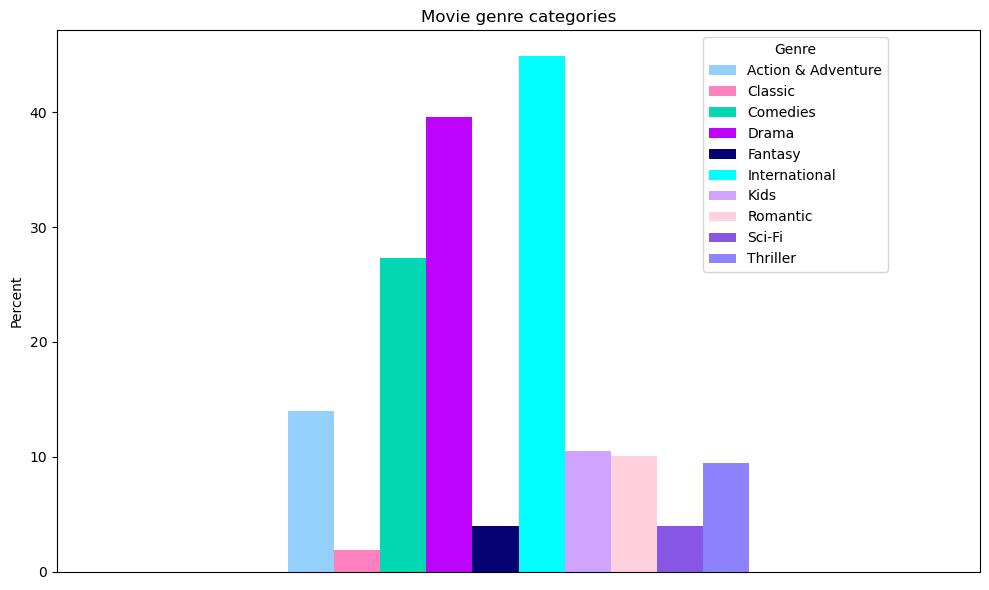

In [243]:
#Plot to show this visually
palette = ['#95d0fc', '#ff81c0', '#04d8b2', '#be03fd', '#040273', '#00ffff', '#cea2fd', '#ffd1df', '#8756e4', '#8e82fe']
sns.set_palette(palette)

labels = ['Action & Adventure', 'Classic', 'Comedies', 'Drama', 'Fantasy', 'International', 'Kids', 'Romantic', 'Sci-Fi', 'Thriller']
genre.plot(kind = 'bar', figsize = (10,6))
plt.title('Movie genre categories')
plt.xlabel(None)
plt.xticks([])
plt.ylabel('Percent')
plt.legend(title = 'Genre', bbox_to_anchor = (0.80, 1), loc = 'upper center')
plt.tight_layout()
plt.savefig('movie genre catergories', bbox_inches = 'tight')

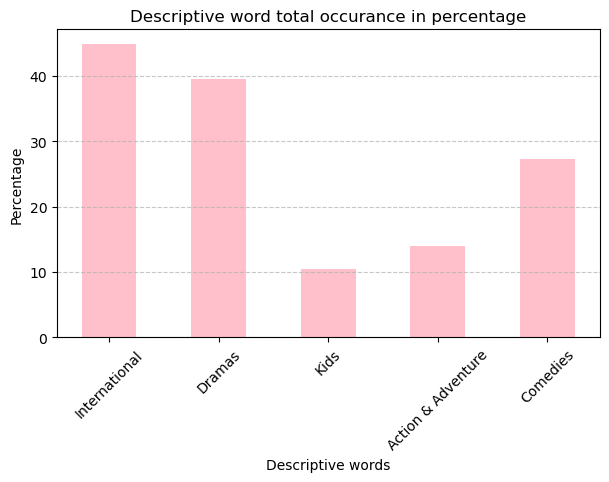

In [93]:
#Descriptive word for movies
plt.figure(figsize=(7,4))

categories = ['International',
              'Dramas',
              'Kids',
              'Action & Adventure',
              'Comedies']

percentages = [all_international_movies.sum(),
               all_drama_movies.sum(),
               all_kids_movies.sum(),
               all_action_movies.sum(),
               all_comedies_movies.sum()]

plt.bar(categories, percentages, color='pink', width=0.5)

plt.xlabel('Descriptive words')
plt.ylabel('Percentage')
plt.title('Descriptive word for movies: total occurance in percentage')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('descriptive word total movies', bbox_inches = 'tight')

In [94]:
#Closer look at international
#Find the string we're looking for
international_str_movies = dfmovies[dfmovies['listed_in'].str.contains('International')]
#Count the occurance of each of the categories found
value_count_ic_movies = international_str_movies['listed_in'].value_counts()
#Calculate the total sum of the value count
total_ic_movies = value_count_ic_movies.sum()
#This give the top ten. Change head for more. Observe that total_listed_count come from line above to compare with all other categories in listed in.
top_ten_percentagesmovies = (value_count_ic_movies /totallisted_countmovies * 100).head(10)
top_ten_percentagesmovies

listed_in
Dramas, International Movies                        5.904420
Comedies, Dramas, International Movies              4.469092
Dramas, Independent Movies, International Movies    4.110259
Documentaries, International Movies                 3.033763
Dramas, International Movies, Romantic Movies       2.935900
Comedies, International Movies                      2.870657
Comedies, International Movies, Romantic Movies     2.479204
Dramas, International Movies, Thrillers             2.185614
Action & Adventure, Dramas, International Movies    2.152993
Action & Adventure, International Movies            1.647366
Name: count, dtype: float64

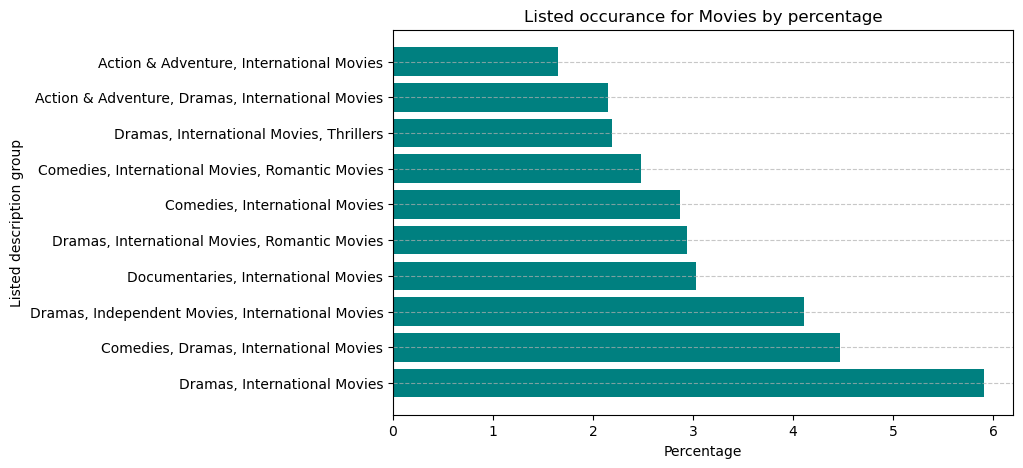

In [95]:
#Size
plt.figure(figsize=(8,5))

plt.barh(top_ten_percentagesmovies.index.astype(str), top_ten_percentagesmovies.values, color='teal')

plt.ylabel('Listed description group')
plt.xlabel('Percentage')
plt.title("Listed occurance 'international' for Movies by percentage")
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('listed occurance movies', bbox_inches = 'tight')

In [96]:
dfmovies.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,25
1,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,24
2,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,24
3,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,24
4,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,9,23


In [97]:
#Find the string we're looking for
drama_strmovies = dfmovies[dfmovies['listed_in'].str.contains('Drama')]
#Count the occurance of each of the categories found
value_count_drmovies = drama_strmovies['listed_in'].value_counts()
#Calculate the total sum of the value count
total_drmovies = value_count_drmovies.sum()
#This give the top ten. Change head for more. Observe that total_listed_count come from line above to compare with all other categories in listed in.
dramatop_ten_percentagesmovies = (value_count_drmovies / total_listed_count * 100).head(10)
dramatop_ten_percentagesmovies

listed_in
Dramas, International Movies                        13.527653
Comedies, Dramas, International Movies              10.239163
Dramas, Independent Movies, International Movies     9.417040
Dramas, International Movies, Romantic Movies        6.726457
Dramas                                               5.156951
Dramas, International Movies, Thrillers              5.007474
Action & Adventure, Dramas, International Movies     4.932735
Comedies, Dramas, Independent Movies                 4.334828
Dramas, Independent Movies                           3.736921
Dramas, Thrillers                                    3.064275
Name: count, dtype: float64

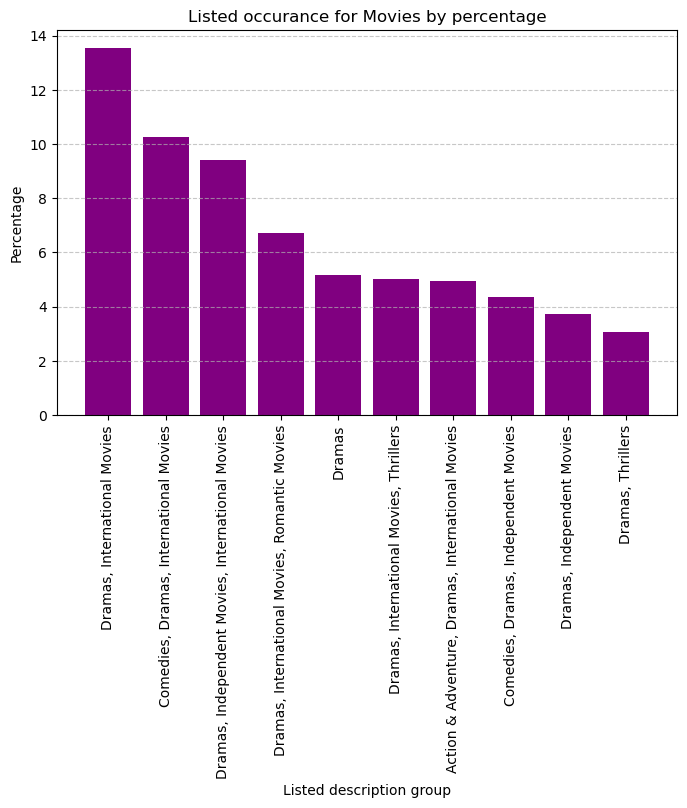

In [98]:
#Size
plt.figure(figsize=(8,5))

plt.bar(dramatop_ten_percentagesmovies.index.astype(str), dramatop_ten_percentagesmovies.values, color='purple')

plt.xlabel('Listed description group')
plt.ylabel('Percentage')
plt.title("Listed occurance for 'Drama' Movies by percentage")
plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('listed occurance moviesdrama', bbox_inches = 'tight')

In [99]:
#Find the string we're looking for
comedy_strmovies = dfmovies[dfmovies['listed_in'].str.contains('Comedies')]
#Count the occurance of each of the categories found
value_count_comovies = comedy_strmovies['listed_in'].value_counts()
#Calculate the total sum of the value count
total_comovies = value_count_comovies.sum()
#This give the top ten. Change head for more. Observe that total_listed_count come from line above to compare with all other categories in listed in.
comedytop_ten_percentagesmovies = (value_count_comovies / total_listed_count * 100).head(10)
comedytop_ten_percentagesmovies

listed_in
Comedies, Dramas, International Movies                10.239163
Children & Family Movies, Comedies                     7.511211
Comedies, International Movies                         6.576981
Comedies, International Movies, Romantic Movies        5.680120
Comedies, Dramas, Independent Movies                   4.334828
Comedies                                               4.110613
Comedies, Romantic Movies                              2.989537
Action & Adventure, Comedies, International Movies     2.615845
Comedies, International Movies, Music & Musicals       2.055306
Action & Adventure, Comedies                           1.905830
Name: count, dtype: float64

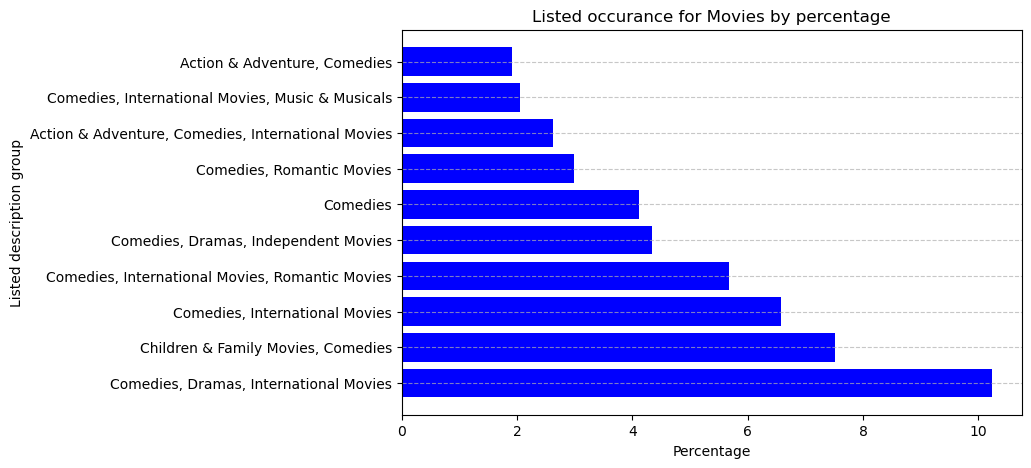

In [227]:
#Size
plt.figure(figsize=(8,5))

plt.barh(comedytop_ten_percentagesmovies.index.astype(str), comedytop_ten_percentagesmovies.values, color='blue')

plt.ylabel('Listed description group')
plt.xlabel('Percentage')
plt.title("Listed occurance for 'comedy' Movies by percentage")
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()
plt.savefig('listed occurance moviescomedy', bbox_inches = 'tight')

In [101]:
dfmovies.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,25
1,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,24
2,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,24
3,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,24
4,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,9,23


In [102]:
countries_movies = [
    "UNITED STATES",
    "UNITED KINGDOM",
    "INDIA",
    "UNKNOWN",
    "CANADA"
]

def country_group_movies(country):
    if country.upper() in countries_movies:
        return country
    else:
        return 'Other'

dfmovies['country_bucket'] = dfmovies['country'].apply(country_group_movies)


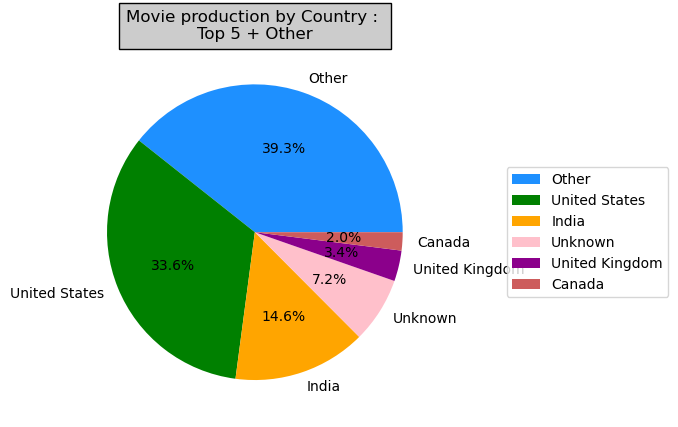

In [103]:
country_movies_count=dfmovies['country_bucket'].value_counts()
mycolors = ["#1E90FF", "green", "orange", "pink", "#8B008B", "#CD5C5C"]
plt.pie(country_movies_count, labels=country_movies_count.index, colors = mycolors, autopct='%1.1f%%')
plt.legend(loc='center', bbox_to_anchor=(1, 0, 0.8, 1))
plt.title("Movie occurance by Country : \n" + "Top 5 + Other", bbox={'facecolor':'0.8', 'pad':5})
#plt.show()
plt.savefig('movie country occurance', bbox_inches = 'tight')

In [105]:
countries_show = [
    "UNITED STATES",
    "UNKNOWN",
    "UNITED KINGDOM",
    "JAPAN",
    "SOUTH KOREA"
     
]

def country_group_show(country):
    if country.upper() in countries_show:
        return country
    else:
        return 'Other'

dfshows['country_bucket'] = dfshows['country'].apply(country_group_show)
dfshows['country_bucket'].value_counts()

country_bucket
Other             985
United States     760
Unknown           391
United Kingdom    213
Japan             169
South Korea       158
Name: count, dtype: int64

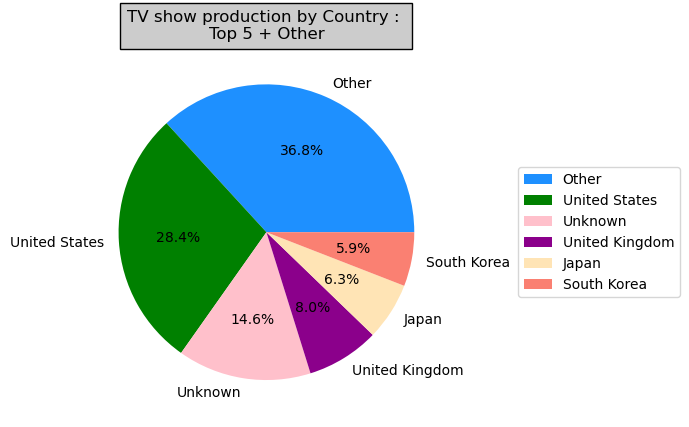

In [106]:
country_show_count=dfshows['country_bucket'].value_counts()
mycolors = ["#1E90FF", "green", "pink", "#8B008B", "#FFE4B5", "#FA8072"]

plt.pie(country_show_count, labels = country_show_count.index, colors = mycolors, autopct='%1.1f%%')
plt.legend(loc='center', bbox_to_anchor=(1, 0, 0.8, 1))
plt.title("TV show occurance by Country : \n" + "Top 5 + Other", bbox={'facecolor':'0.8', 'pad':5})
#plt.show()
plt.savefig('TVshows country occurance', bbox_inches = 'tight')

In [107]:
longestshow = dfshows[dfshows['duration'] == 17]
longestshow

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day,country_bucket
204,548,s549,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,7,3,United States


In [108]:
#Greys Anatomy but this is out of date as Greys is on Disney now
#430 episodes

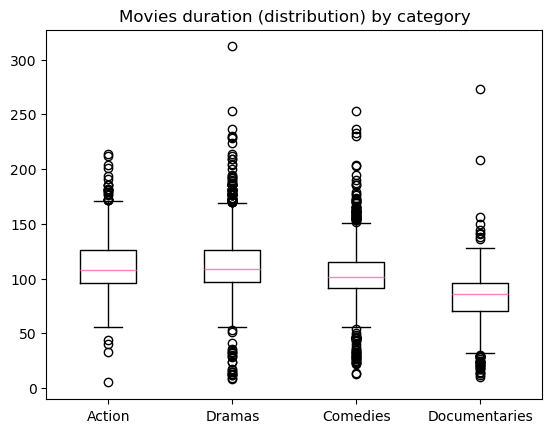

In [109]:
#boxplot code for duration of categories in movies:
filter_columns=['type', 'duration']
filter_action_df=dfmovies['listed_in'].str.contains('Action')
df_action=dfmovies.loc[filter_action_df, filter_columns]


filter_drama_df=dfmovies['listed_in'].str.contains('Dramas')
df_drama=dfmovies.loc[filter_drama_df, filter_columns]


filter_comedy_df=dfmovies['listed_in'].str.contains('Comedies')
df_comedy=dfmovies.loc[filter_comedy_df, filter_columns]

filter_docum_df=dfmovies['listed_in'].str.contains('Documentaries')
df_docum=dfmovies.loc[filter_docum_df, filter_columns]


data=[df_action['duration'], df_drama['duration'], df_comedy['duration'], df_docum['duration']]
df_action.describe
df_drama.describe
df_comedy.describe
plt.boxplot(data, labels=['Action', 'Dramas', 'Comedies', 'Documentaries' ])
plt.title("Movies duration (distribution) by category")
#plt.show()

plt.savefig('movie category duration bocplot', bbox_inches = 'tight')

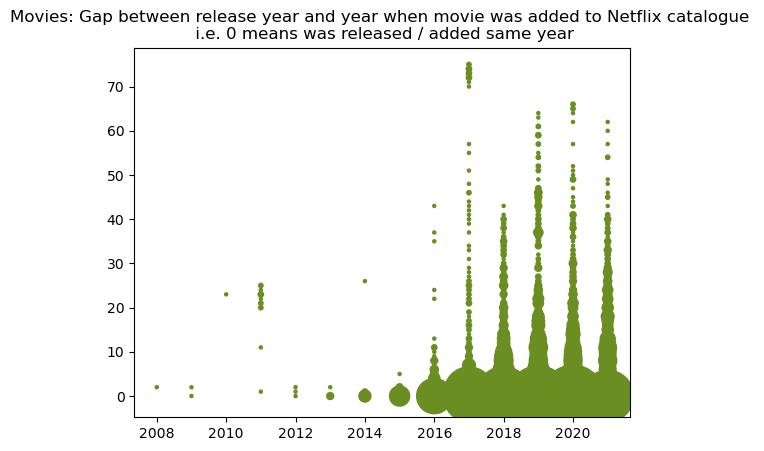

In [110]:
#scatter / bubble one :
dfmovies['added_year'] = dfmovies['date_added'].dt.year.astype('Int64')
dfmovies['release_year_gap'] = dfmovies['added_year'] - dfmovies['release_year']

chart_columns=['added_year', 'release_year_gap']
df_movies_release_gap=dfmovies[chart_columns]

df_scatter=df_movies_release_gap.groupby(['added_year','release_year_gap']).size().reset_index(name='size')

plt.scatter(df_scatter['added_year'], df_scatter['release_year_gap'], s=df_scatter['size']*5, color='#6B8E23')

plt.title("Movies: Gap between release year and year when movie was added to Netflix catalogue \n " + "i.e. 0 means was released / added same year")
plt.savefig('movie gap between release and adding', bbox_inches = 'tight')

In [111]:
longestmovie = dfmovies[dfmovies['duration']== 312]
longestmovie

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day,country_bucket,added_year,release_year_gap
2703,4253,s4254,Movie,Black Mirror: Bandersnatch,Unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",12,28,United States,2018,0


In [112]:
df1['cast'].unique()

array(['Unknown',
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)